In [8]:
pip install pandas



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd

# File paths for the datasets
files_to_fetch = {
    "DistanceWalkingRunning": "/Users/yusufsinanozmen/Downloads/project/HKQuantityTypeIdentifierDistanceWalkingRunning.csv",
    "ActiveEnergyBurned": "/Users/yusufsinanozmen/Downloads/project/HKQuantityTypeIdentifierActiveEnergyBurned.csv",
    "WalkingStepLength": "/Users/yusufsinanozmen/Downloads/project/HKQuantityTypeIdentifierWalkingStepLength.csv",
    "StepCount": "/Users/yusufsinanozmen/Downloads/project/HKQuantityTypeIdentifierStepCount.csv"
}

# Initialize a dictionary to store cleaned DataFrames
cleaned_dataframes = {}

# Load, clean, and process each file
for name, path in files_to_fetch.items():
    try:
        # Read the dataset, skipping unnecessary rows and using semicolon as delimiter
        df = pd.read_csv(path, delimiter=';', skiprows=1, engine='python')
        
        # Drop unnecessary columns like "Unnamed" or "sep="
        df = df.drop(columns=[col for col in df.columns if "Unnamed" in col or "sep=" in col], errors='ignore')
        
        # Convert date columns to datetime
        for col in ['creationDate', 'startDate', 'endDate']:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Ensure 'value' is numeric
        if 'value' in df.columns:
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
        
        # Save the cleaned DataFrame
        cleaned_dataframes[name] = df
        print(f"{name} dataset cleaned successfully.")
    except Exception as e:
        print(f"Error cleaning {name}: {e}")

# Display previews of the cleaned datasets
for name, df in cleaned_dataframes.items():
    print(f"\n{name} - Cleaned Data Preview:")
    print(df)


DistanceWalkingRunning dataset cleaned successfully.
ActiveEnergyBurned dataset cleaned successfully.
WalkingStepLength dataset cleaned successfully.
StepCount dataset cleaned successfully.

DistanceWalkingRunning - Cleaned Data Preview:
                                                 type      sourcename  \
0      HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
1      HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
2      HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
3      HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
4      HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
...                                               ...             ...   
42083  HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
42084  HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
42085  HKQuantityTypeIdentifierDistanceWalkingRunning  Yusuf’s iPhone   
42086  HKQuantityTypeIdentifierD

Daily Steps Data:
                      startdate  total_steps
0     2020-06-18 04:31:05+03:00           13
1     2020-06-18 05:15:19+03:00           16
2     2020-06-18 05:32:51+03:00           13
3     2020-06-18 06:39:50+03:00           14
4     2020-06-18 07:02:23+03:00           16
...                         ...          ...
42100 2024-11-24 15:32:03+03:00          101
42101 2024-11-24 16:21:57+03:00          235
42102 2024-11-24 16:34:17+03:00          502
42103 2024-11-24 17:17:32+03:00          840
42104 2024-11-24 17:27:31+03:00          128

[42105 rows x 2 columns]

Monthly Steps Aggregates:
    year  month  total_steps  average_steps
0   2020      6           80      13.333333
1   2020      8        37003     177.899038
2   2020      9       126387     196.558320
3   2020     10       151145     212.580872
4   2020     11       107852     201.970037
5   2020     12        74103     127.543890
6   2021      1        74186     120.824104
7   2021      2        96259     157.

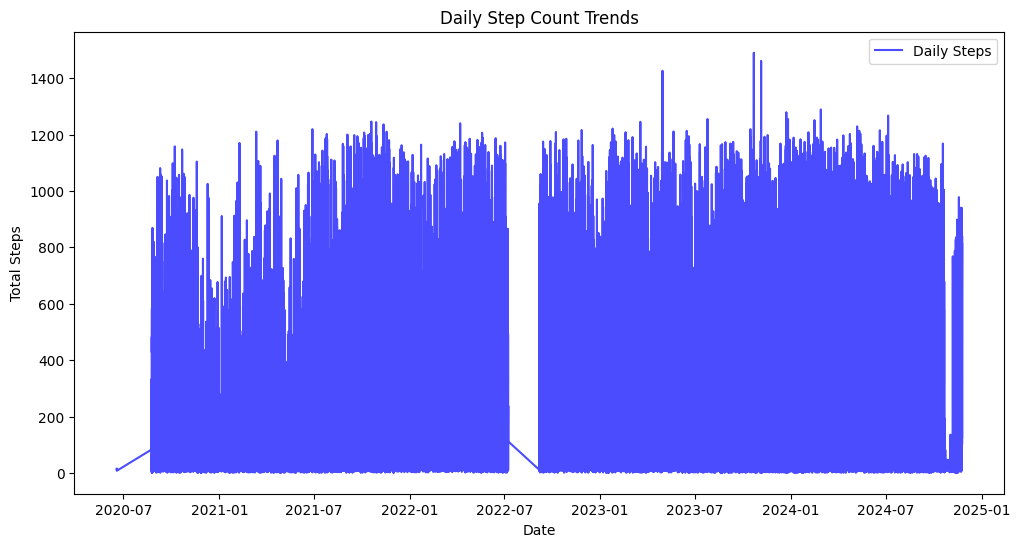

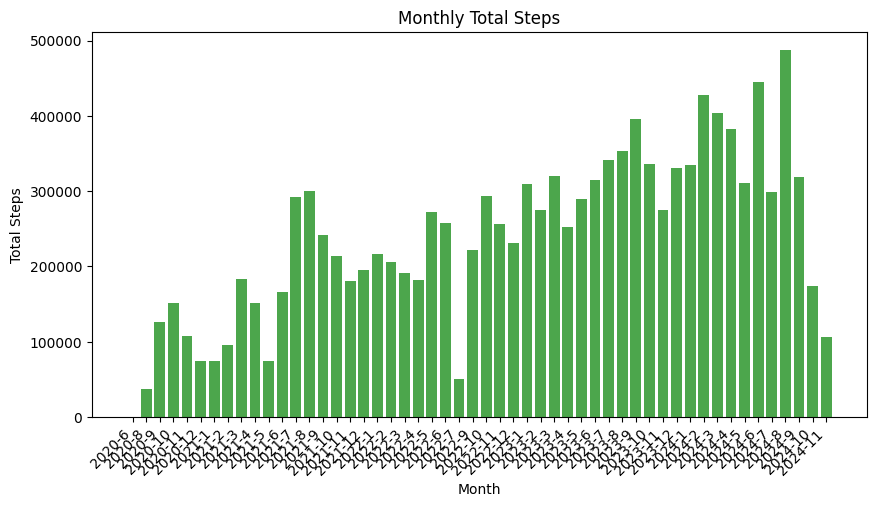

In [22]:
step_count_df['startdate'] = pd.to_datetime(step_count_df['startdate'], errors='coerce')

daily_steps = step_count_df.groupby(['startdate'])['value'].sum().reset_index(name='total_steps')

step_count_df['year'] = step_count_df['startdate'].dt.year
step_count_df['month'] = step_count_df['startdate'].dt.month

monthly_steps_aggregate = step_count_df.groupby(['year', 'month'])['value'].agg(['sum', 'mean']).reset_index()
monthly_steps_aggregate.columns = ['year', 'month', 'total_steps', 'average_steps']

step_count_df['season'] = step_count_df['startdate'].dt.month % 12 // 3 + 1
step_count_df['season'] = step_count_df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

seasonal_steps_aggregate = step_count_df.groupby(['year', 'season'])['value'].agg(['sum', 'mean']).reset_index()
seasonal_steps_aggregate.columns = ['year', 'season', 'total_steps', 'average_steps']

print("Daily Steps Data:")
print(daily_steps)

print("\nMonthly Steps Aggregates:")
print(monthly_steps_aggregate)

print("\nSeasonal Steps Aggregates:")
print(seasonal_steps_aggregate)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_steps['startdate'], daily_steps['total_steps'], label='Daily Steps', color='blue', alpha=0.7)
plt.title('Daily Step Count Trends')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
monthly_steps_aggregate['month_label'] = monthly_steps_aggregate['year'].astype(str) + '-' + monthly_steps_aggregate['month'].astype(str)
plt.bar(monthly_steps_aggregate['month_label'], monthly_steps_aggregate['total_steps'], color='green', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Total Steps')
plt.xlabel('Month')
plt.ylabel('Total Steps')
plt.show()



Daily Distance Data:
                      startdate  total_distance
0     2020-06-18 04:31:05+03:00         0.00861
1     2020-06-18 05:15:19+03:00         0.00912
2     2020-06-18 05:32:51+03:00         0.00663
3     2020-06-18 06:39:50+03:00         0.00890
4     2020-06-18 07:02:23+03:00         0.01100
...                         ...             ...
42083 2024-11-24 15:32:03+03:00         0.07483
42084 2024-11-24 16:21:57+03:00         0.15500
42085 2024-11-24 16:34:17+03:00         0.36925
42086 2024-11-24 17:17:32+03:00         0.63787
42087 2024-11-24 17:27:31+03:00         0.09410

[42088 rows x 2 columns]

Monthly Distance Aggregates:
    year  month  total_distance  average_distance
0   2020      6        0.047700          0.007950
1   2020      8       24.998064          0.120183
2   2020      9       85.061256          0.132288
3   2020     10      102.612697          0.144322
4   2020     11       74.862392          0.140192
5   2020     12       50.722498          0.0873

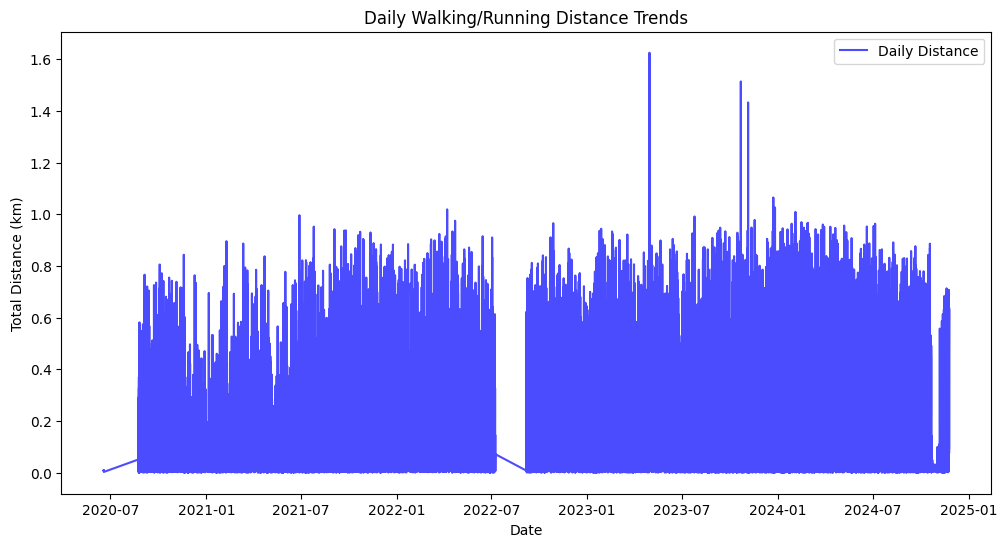

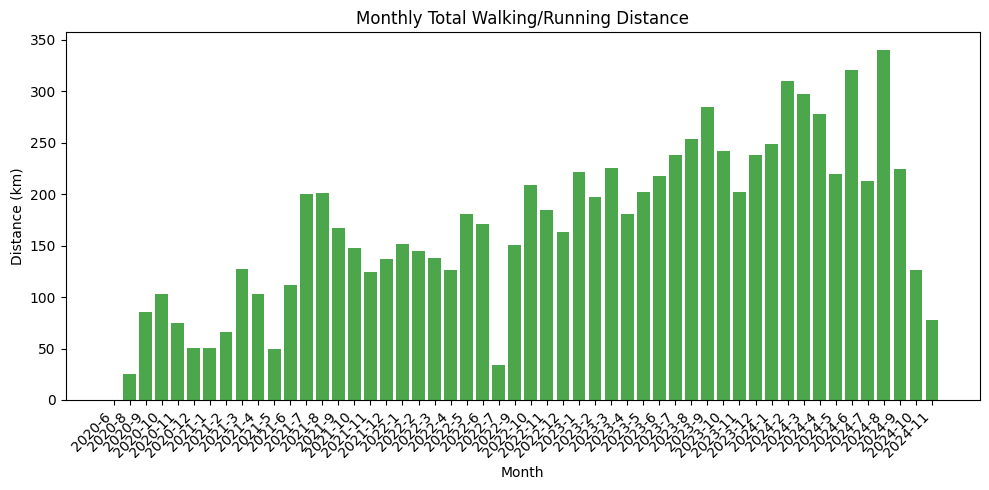

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

distance_df = cleaned_dataframes["DistanceWalkingRunning"]

distance_df['startdate'] = pd.to_datetime(distance_df['startdate'], errors='coerce')

daily_distance = (
    distance_df
    .groupby(['startdate'])['value']
    .sum()
    .reset_index(name='total_distance')
)

distance_df['year'] = distance_df['startdate'].dt.year
distance_df['month'] = distance_df['startdate'].dt.month

monthly_distance_aggregate = (
    distance_df
    .groupby(['year', 'month'])['value']
    .agg(['sum', 'mean'])
    .reset_index()
)
monthly_distance_aggregate.columns = ['year', 'month', 'total_distance', 'average_distance']

distance_df['season'] = distance_df['startdate'].dt.month % 12 // 3 + 1
distance_df['season'] = distance_df['season'].map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn'
})

seasonal_distance_aggregate = (
    distance_df
    .groupby(['year', 'season'])['value']
    .agg(['sum', 'mean'])
    .reset_index()
)
seasonal_distance_aggregate.columns = ['year', 'season', 'total_distance', 'average_distance']

print("Daily Distance Data:")
print(daily_distance)

print("\nMonthly Distance Aggregates:")
print(monthly_distance_aggregate)

print("\nSeasonal Distance Aggregates:")
print(seasonal_distance_aggregate)


plt.figure(figsize=(12, 6))
plt.plot(daily_distance['startdate'], daily_distance['total_distance'],
         label='Daily Distance', color='blue', alpha=0.7)
plt.title('Daily Walking/Running Distance Trends')
plt.xlabel('Date')
plt.ylabel('Total Distance (km)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
monthly_distance_aggregate['month_label'] = (
    monthly_distance_aggregate['year'].astype(str) 
    + '-' 
    + monthly_distance_aggregate['month'].astype(str)
)
plt.bar(monthly_distance_aggregate['month_label'],
        monthly_distance_aggregate['total_distance'],
        color='green', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Total Walking/Running Distance')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.tight_layout()
plt.show()


=== Daily Active Energy Burned (kcal) ===
                      startdate  total_kcal
0     2022-06-21 20:37:10+03:00      26.905
1     2022-06-21 21:54:14+03:00      13.341
2     2022-06-21 22:06:14+03:00       0.030
3     2022-06-21 22:20:53+03:00       0.023
4     2022-06-21 22:35:25+03:00       0.013
...                         ...         ...
29380 2024-11-24 15:32:01+03:00       2.063
29381 2024-11-24 16:21:52+03:00       3.940
29382 2024-11-24 16:34:14+03:00      18.994
29383 2024-11-24 17:17:30+03:00      21.633
29384 2024-11-24 17:27:26+03:00       7.370

[29385 rows x 2 columns]
Total rows: 29385

=== Monthly Active Energy Burned (kcal) ===
    year  month  total_kcal  average_kcal
0   2022      6    1512.737      4.155871
1   2022      7     710.467      3.088987
2   2022      9    3850.660      5.485271
3   2022     10    8393.930      7.428257
4   2022     11    7468.369      7.321930
5   2022     12    6316.673      5.644927
6   2023      1    8438.519      7.091192
7   2

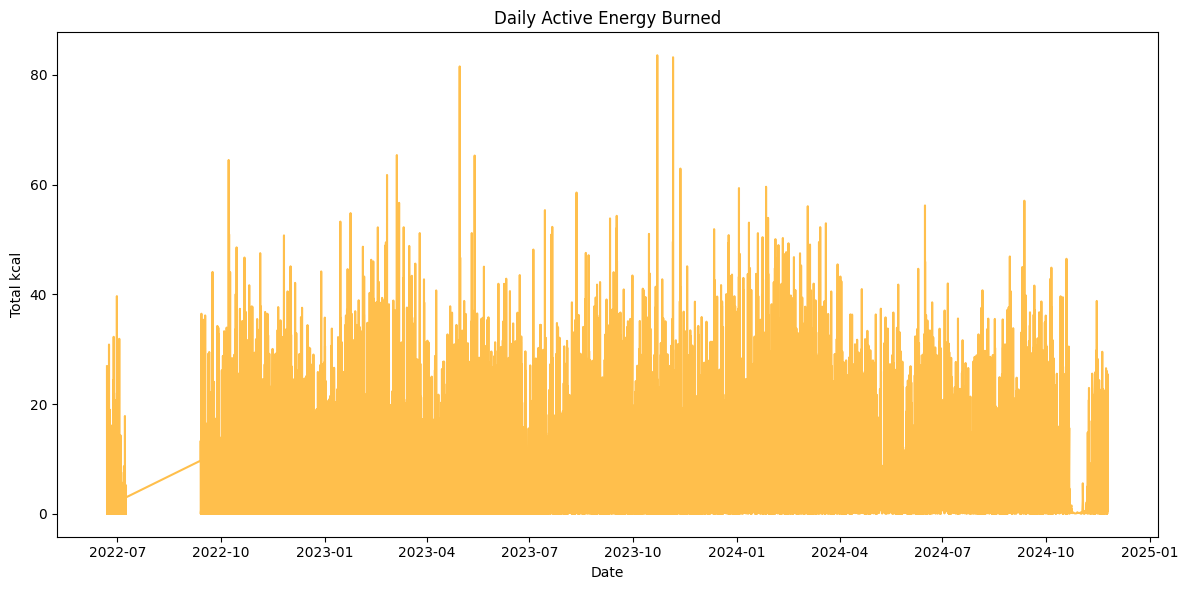

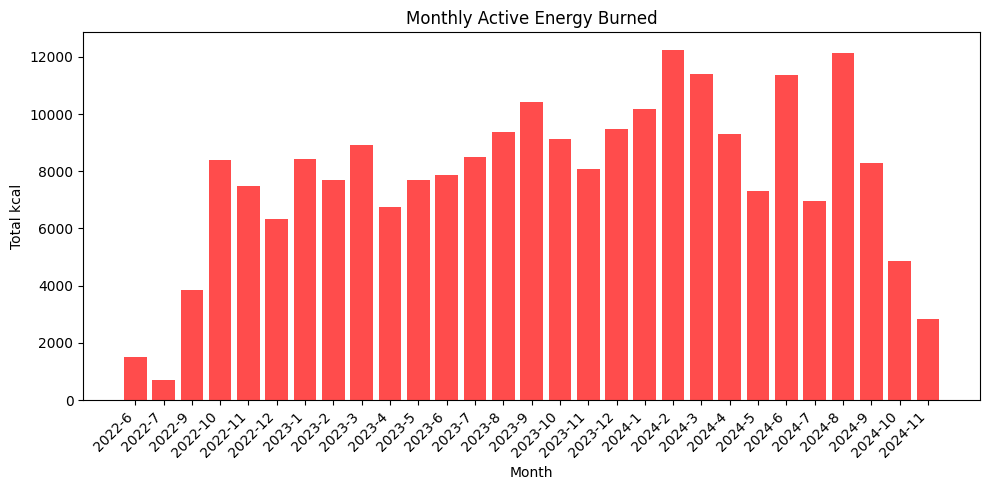

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

energy_df = cleaned_dataframes["ActiveEnergyBurned"]

energy_df['startdate'] = pd.to_datetime(energy_df['startdate'], errors='coerce')

daily_energy = (
    energy_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_kcal')
)

energy_df['year'] = energy_df['startdate'].dt.year
energy_df['month'] = energy_df['startdate'].dt.month

monthly_energy_aggregate = (
    energy_df
    .groupby(['year', 'month'])['value']
    .agg(['sum', 'mean'])
    .reset_index()
)
monthly_energy_aggregate.columns = ['year', 'month', 'total_kcal', 'average_kcal']

energy_df['season'] = energy_df['startdate'].dt.month % 12 // 3 + 1
energy_df['season'] = energy_df['season'].map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn'
})

seasonal_energy_aggregate = (
    energy_df
    .groupby(['year', 'season'])['value']
    .agg(['sum', 'mean'])
    .reset_index()
)
seasonal_energy_aggregate.columns = ['year', 'season', 'total_kcal', 'average_kcal']

print("=== Daily Active Energy Burned (kcal) ===")
print(daily_energy)
print(f"Total rows: {len(daily_energy)}")

print("\n=== Monthly Active Energy Burned (kcal) ===")
print(monthly_energy_aggregate)

print("\n=== Seasonal Active Energy Burned (kcal) ===")
print(seasonal_energy_aggregate)


plt.figure(figsize=(12, 6))
plt.plot(daily_energy['startdate'], daily_energy['total_kcal'], color='orange', alpha=0.7)
plt.title('Daily Active Energy Burned')
plt.xlabel('Date')
plt.ylabel('Total kcal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
monthly_energy_aggregate['month_label'] = (
    monthly_energy_aggregate['year'].astype(str)
    + '-'
    + monthly_energy_aggregate['month'].astype(str)
)
plt.bar(monthly_energy_aggregate['month_label'],
        monthly_energy_aggregate['total_kcal'],
        color='red', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Active Energy Burned')
plt.xlabel('Month')
plt.ylabel('Total kcal')
plt.tight_layout()
plt.show()


=== Daily Average Step Length (cm) ===
                  startdate  avg_step_length_cm
0 2020-09-17 10:16:28+03:00                44.0
1 2020-09-17 10:18:01+03:00                49.0
2 2020-09-17 10:21:45+03:00                51.0
3 2020-09-17 10:23:04+03:00                50.0
4 2020-09-17 10:24:36+03:00                52.0
Total rows: 58261

=== Monthly Average Step Length (cm) ===
   year  month  avg_step_length_cm
0  2020      9           60.434043
1  2020     10           58.826284
2  2020     11           60.680505
3  2020     12           58.221429
4  2021      1           56.551282

=== Seasonal Average Step Length (cm) ===
   year  season  avg_step_length_cm
0  2020  Autumn           59.794624
1  2020  Winter           58.221429
2  2021  Autumn           62.069149
3  2021  Spring           58.204136
4  2021  Summer           57.696744


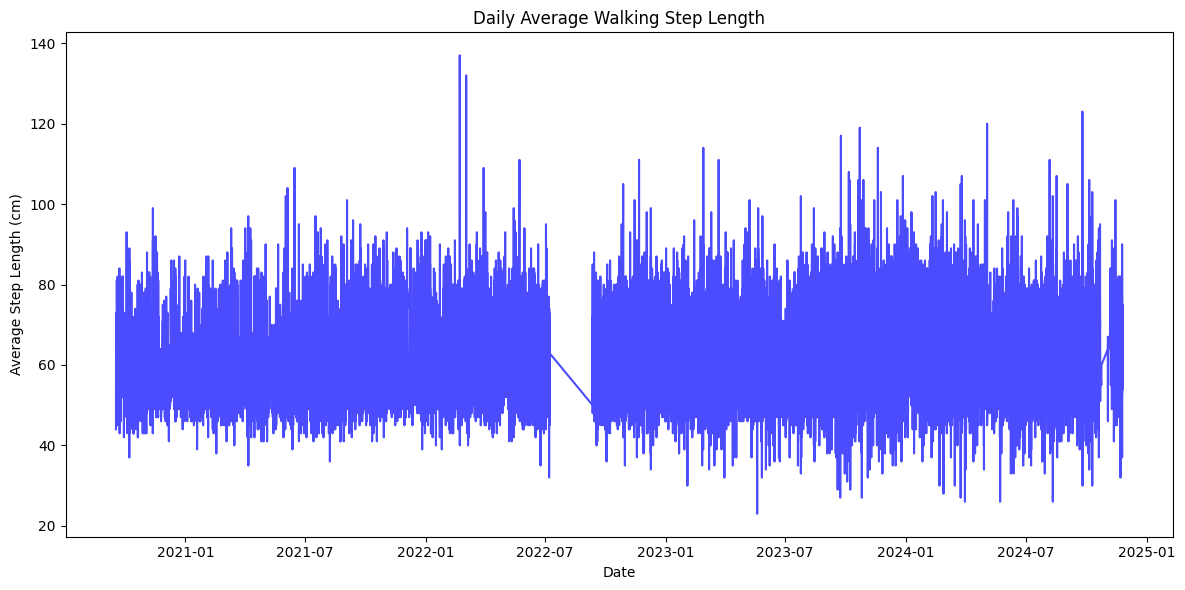

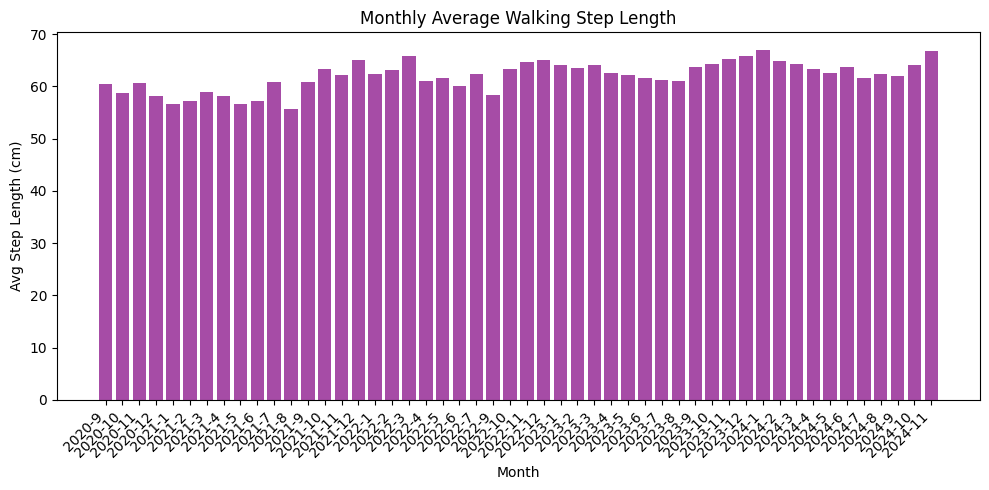

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

step_length_df = cleaned_dataframes["WalkingStepLength"]

step_length_df['startdate'] = pd.to_datetime(step_length_df['startdate'], errors='coerce')

daily_step_length = (
    step_length_df
    .groupby('startdate')['value']
    .mean()
    .reset_index(name='avg_step_length_cm')
)

step_length_df['year'] = step_length_df['startdate'].dt.year
step_length_df['month'] = step_length_df['startdate'].dt.month

monthly_step_length_aggregate = (
    step_length_df
    .groupby(['year', 'month'])['value']
    .mean()
    .reset_index(name='avg_step_length_cm')
)

step_length_df['season'] = step_length_df['startdate'].dt.month % 12 // 3 + 1
step_length_df['season'] = step_length_df['season'].map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Autumn'
})

seasonal_step_length_aggregate = (
    step_length_df
    .groupby(['year', 'season'])['value']
    .mean()
    .reset_index(name='avg_step_length_cm')
)

print("=== Daily Average Step Length (cm) ===")
print(daily_step_length.head())
print(f"Total rows: {len(daily_step_length)}")

print("\n=== Monthly Average Step Length (cm) ===")
print(monthly_step_length_aggregate.head())

print("\n=== Seasonal Average Step Length (cm) ===")
print(seasonal_step_length_aggregate.head())


plt.figure(figsize=(12, 6))
plt.plot(daily_step_length['startdate'], daily_step_length['avg_step_length_cm'],
         color='blue', alpha=0.7)
plt.title('Daily Average Walking Step Length')
plt.xlabel('Date')
plt.ylabel('Average Step Length (cm)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
monthly_step_length_aggregate['month_label'] = (
    monthly_step_length_aggregate['year'].astype(str)
    + '-'
    + monthly_step_length_aggregate['month'].astype(str)
)
plt.bar(monthly_step_length_aggregate['month_label'],
        monthly_step_length_aggregate['avg_step_length_cm'],
        color='purple', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Average Walking Step Length')
plt.xlabel('Month')
plt.ylabel('Avg Step Length (cm)')
plt.tight_layout()
plt.show()


Preview of merged DataFrame:
                     startdate  total_steps  total_distance  \
1998 2020-10-20 22:04:15+03:00        524.0         0.35141   
2123 2020-10-24 14:10:58+03:00        277.0         0.18225   
2256 2020-10-26 23:55:36+03:00          7.0         0.00490   
2444 2020-10-31 18:42:57+03:00        268.0         0.18900   
2686 2020-11-08 23:37:56+03:00         15.0         0.00847   

      avg_step_length_cm  steps_per_km  
1998                48.0   1491.135710  
2123                65.0   1519.890261  
2256                54.0   1428.571429  
2444                62.0   1417.989418  
2686                57.0   1770.956316  


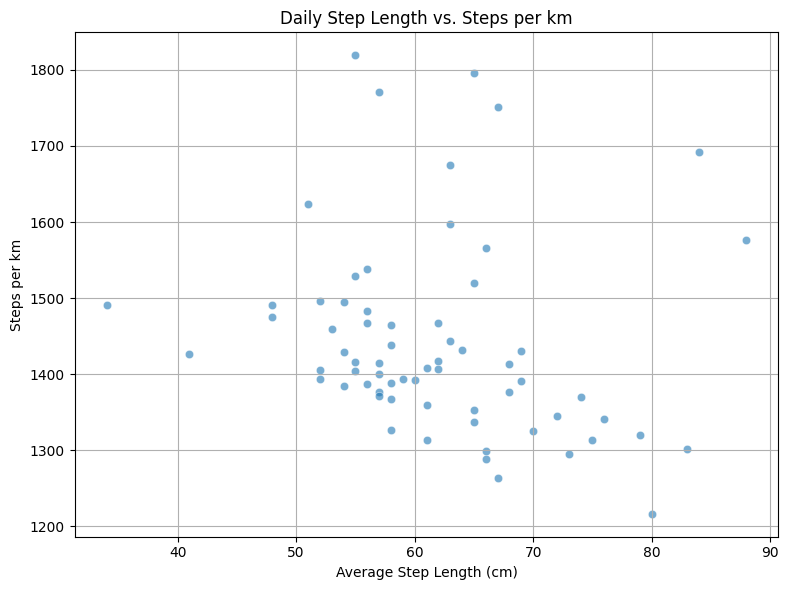

Correlation between average step length and steps_per_km: -0.174


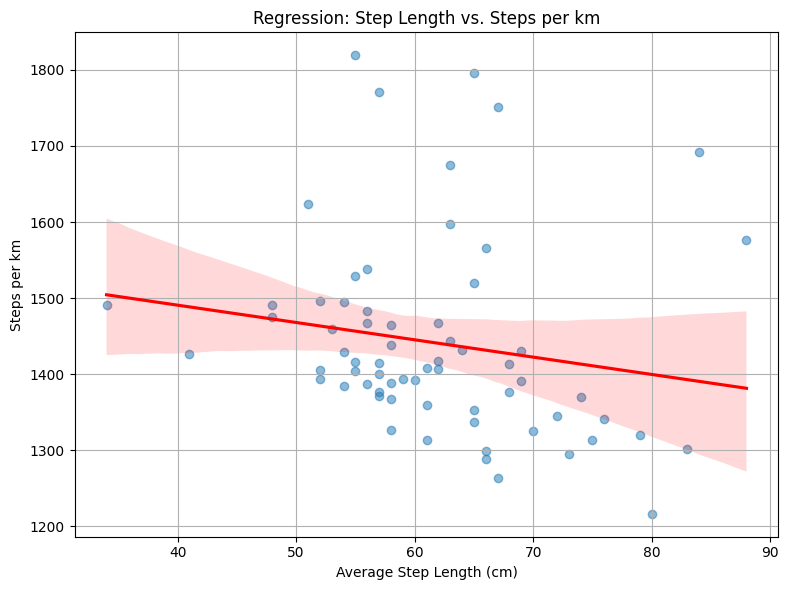

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_df = cleaned_dataframes["StepCount"]
distance_df = cleaned_dataframes["DistanceWalkingRunning"]
step_length_df = cleaned_dataframes["WalkingStepLength"]

step_df['startdate'] = pd.to_datetime(step_df['startdate'], errors='coerce')
distance_df['startdate'] = pd.to_datetime(distance_df['startdate'], errors='coerce')
step_length_df['startdate'] = pd.to_datetime(step_length_df['startdate'], errors='coerce')

daily_steps = (
    step_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_steps')
)

daily_distance = (
    distance_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_distance')
)

daily_step_length = (
    step_length_df
    .groupby('startdate')['value']
    .mean()
    .reset_index(name='avg_step_length_cm')
)

merged_df = pd.merge(daily_steps, daily_distance, on='startdate', how='outer')
merged_df = pd.merge(merged_df, daily_step_length, on='startdate', how='outer')

merged_df = merged_df.dropna(subset=['total_distance', 'total_steps', 'avg_step_length_cm'])
merged_df = merged_df[merged_df['total_distance'] > 0]

merged_df['steps_per_km'] = merged_df['total_steps'] / merged_df['total_distance']

print("Preview of merged DataFrame:")
print(merged_df.head())


plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='avg_step_length_cm', y='steps_per_km', alpha=0.6)
plt.title('Daily Step Length vs. Steps per km')
plt.xlabel('Average Step Length (cm)')
plt.ylabel('Steps per km')
plt.grid(True)
plt.tight_layout()
plt.show()


corr_value = merged_df[['avg_step_length_cm', 'steps_per_km']].corr().iloc[0, 1]
print(f"Correlation between average step length and steps_per_km: {corr_value:.3f}")

plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='avg_step_length_cm', y='steps_per_km',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression: Step Length vs. Steps per km')
plt.xlabel('Average Step Length (cm)')
plt.ylabel('Steps per km')
plt.grid(True)
plt.tight_layout()
plt.show()


=== Merged Data with Derived Metrics (head) ===
                       startdate  total_steps  total_distance_km  total_kcal  \
40346  2022-10-05 16:32:53+03:00         37.0            0.02034       0.349   
67257  2023-06-20 18:58:31+03:00        948.0            0.67419      24.517   
92933  2024-01-27 14:35:30+03:00       1047.0            0.73138       4.407   
94192  2024-02-06 22:40:34+03:00         97.0            0.07257       1.896   
116598 2024-08-07 21:36:21+03:00        892.0            0.55820       2.343   

        avg_step_length_cm  steps_per_km  kcal_per_step  kcal_per_km  
40346                 55.0   1819.075713       0.009432    17.158309  
67257                 52.0   1406.131803       0.025862    36.365120  
92933                 64.0   1431.540376       0.004209     6.025595  
94192                 65.0   1336.640485       0.019546    26.126499  
116598                63.0   1597.993551       0.002627     4.197420  

=== Correlation Matrix ===
                 

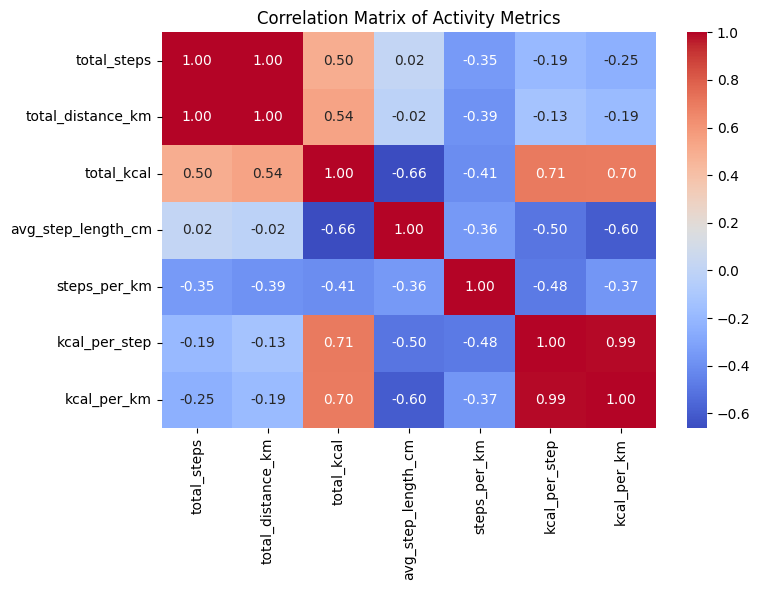

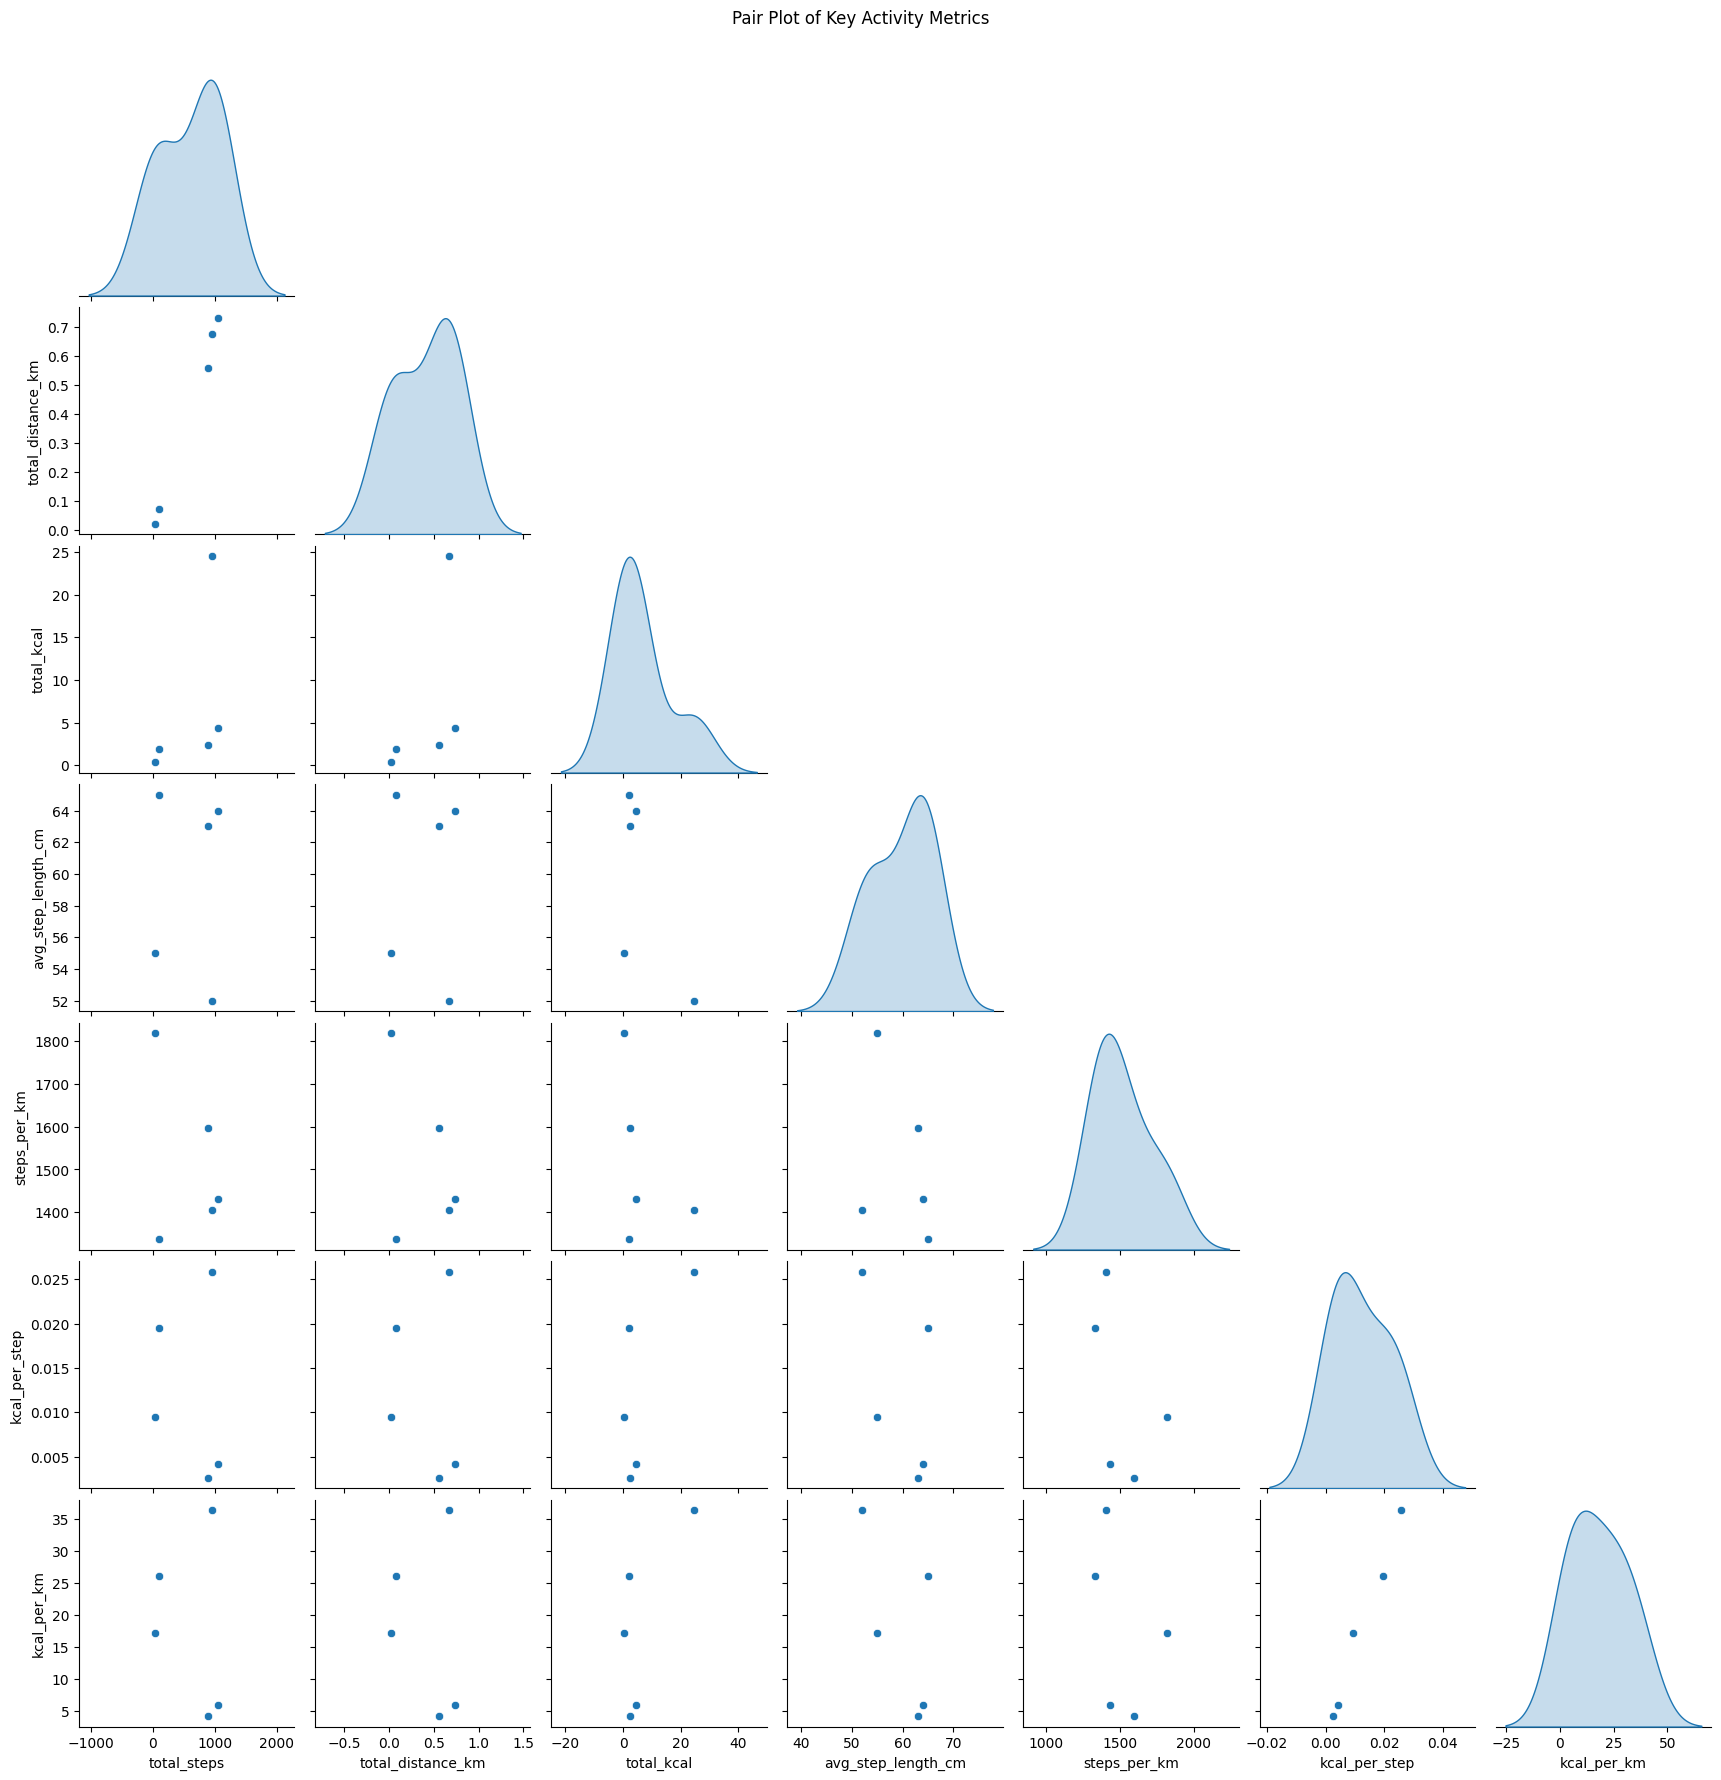

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step_df = cleaned_dataframes["StepCount"]
distance_df = cleaned_dataframes["DistanceWalkingRunning"]
energy_df = cleaned_dataframes["ActiveEnergyBurned"]
step_len_df = cleaned_dataframes["WalkingStepLength"]

for df in [step_df, distance_df, energy_df, step_len_df]:
    df['startdate'] = pd.to_datetime(df['startdate'], errors='coerce')

daily_steps = (
    step_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_steps')
)

daily_distance = (
    distance_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_distance_km')
)

daily_energy = (
    energy_df
    .groupby('startdate')['value']
    .sum()
    .reset_index(name='total_kcal')
)

daily_step_length = (
    step_len_df
    .groupby('startdate')['value']
    .mean()
    .reset_index(name='avg_step_length_cm')
)

merged_df = (daily_steps
             .merge(daily_distance, on='startdate', how='outer')
             .merge(daily_energy, on='startdate', how='outer')
             .merge(daily_step_length, on='startdate', how='outer'))

merged_df = merged_df.dropna(subset=['total_steps', 'total_distance_km', 'total_kcal', 'avg_step_length_cm'])
merged_df = merged_df[merged_df['total_distance_km'] > 0]

merged_df['steps_per_km'] = merged_df['total_steps'] / merged_df['total_distance_km']

merged_df['kcal_per_step'] = merged_df['total_kcal'] / merged_df['total_steps']

merged_df['kcal_per_km'] = merged_df['total_kcal'] / merged_df['total_distance_km']

print("=== Merged Data with Derived Metrics (head) ===")
print(merged_df)

cols_of_interest = [
    'total_steps', 
    'total_distance_km', 
    'total_kcal', 
    'avg_step_length_cm',
    'steps_per_km',
    'kcal_per_step',
    'kcal_per_km'
]

correlation_matrix = merged_df[cols_of_interest].corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Activity Metrics")
plt.tight_layout()
plt.show()

sns.pairplot(merged_df[cols_of_interest], corner=True, diag_kind='kde')
plt.suptitle('Pair Plot of Key Activity Metrics', y=1.02)
plt.show()

Monthly Aggregated Data:
    year  month  total_steps  total_distance  total_energy
0   2020      6           80        0.047700         0.000
1   2020      8        37003       24.998064         0.000
2   2020      9       126387       85.061256         0.000
3   2020     10       151145      102.612697         0.000
4   2020     11       107852       74.862392         0.000
5   2020     12        74103       50.722498         0.000
6   2021      1        74186       50.624335         0.000
7   2021      2        96259       65.579286         0.000
8   2021      3       183555      126.833977         0.000
9   2021      4       151187      102.695527         0.000
10  2021      5        74440       49.580700         0.000
11  2021      6       165491      111.400773         0.000
12  2021      7       292712      199.738189         0.000
13  2021      8       300558      201.320968         0.000
14  2021      9       241571      166.679290         0.000
15  2021     10       213331   

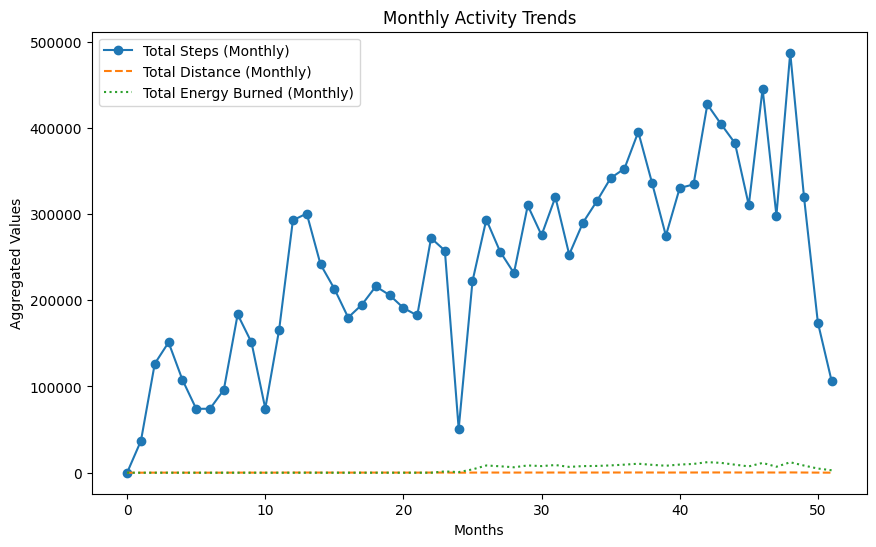


Correlation between Total Distance and Total Energy Burned (Monthly): 0.8454067728104635


In [54]:
import matplotlib.pyplot as plt

def ensure_time_columns(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['month'] = df[date_col].dt.month
    df['year'] = df[date_col].dt.year
    df['season'] = df[date_col].dt.month % 12 // 3 + 1  # Map months to seasons
    df['season'] = df['season'].map({
        1: 'Winter',
        2: 'Spring',
        3: 'Summer',
        4: 'Autumn'
    })
    return df

step_count_df = ensure_time_columns(cleaned_dataframes['StepCount'], 'startdate')
distance_df = ensure_time_columns(cleaned_dataframes['DistanceWalkingRunning'], 'startdate')
energy_df = ensure_time_columns(cleaned_dataframes['ActiveEnergyBurned'], 'startdate')

monthly_steps = step_count_df.groupby(['year', 'month'])['value'].sum().reset_index(name='total_steps')
monthly_distance = distance_df.groupby(['year', 'month'])['value'].sum().reset_index(name='total_distance')
monthly_energy = energy_df.groupby(['year', 'month'])['value'].sum().reset_index(name='total_energy')

monthly_data = pd.merge(monthly_steps, monthly_distance, on=['year', 'month'], how='outer')
monthly_data = pd.merge(monthly_data, monthly_energy, on=['year', 'month'], how='outer').fillna(0)

seasonal_steps = step_count_df.groupby(['year', 'season'])['value'].sum().reset_index(name='total_steps')
seasonal_distance = distance_df.groupby(['year', 'season'])['value'].sum().reset_index(name='total_distance')
seasonal_energy = energy_df.groupby(['year', 'season'])['value'].sum().reset_index(name='total_energy')

seasonal_data = pd.merge(seasonal_steps, seasonal_distance, on=['year', 'season'], how='outer')
seasonal_data = pd.merge(seasonal_data, seasonal_energy, on=['year', 'season'], how='outer').fillna(0)

correlation = monthly_data[['total_distance', 'total_energy']].corr().iloc[0, 1]

print("Monthly Aggregated Data:")
print(monthly_data)

print("\nSeasonal Aggregated Data:")
print(seasonal_data)

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['total_steps'], label='Total Steps (Monthly)', marker='o')
plt.plot(monthly_data['total_distance'], label='Total Distance (Monthly)', linestyle='--')
plt.plot(monthly_data['total_energy'], label='Total Energy Burned (Monthly)', linestyle=':')
plt.title('Monthly Activity Trends')
plt.xlabel('Months')
plt.ylabel('Aggregated Values')
plt.legend()
plt.show()

print("\nCorrelation between Total Distance and Total Energy Burned (Monthly):", correlation)
